ANALYSIS:

1) As we approach the equator and Latitude approaches 0, max temperature goes up. Trend can be seen on plot for "City Latitude vs Max Temperature (F)".

2) There appears to be more cities on the Northern Hemisphere than the Souther Hemisphere. This is shown by our sample size of 500 and most data points residing on the latitudes of greater than 0.

3) A loose direct correlation between wind speeds and distance from the equator seems to imply that wind speeds are higher further from the equator.

In [197]:
#Import dependencies
import pandas as pd
import requests
import numpy as np
import random
import csv
import seaborn as sns
import matplotlib.pyplot as plt
from config import api_key
import time

world_cities = pd.read_csv('worldcities.csv')
world_cities.head()

sns.set_style("whitegrid")
sns.set_context("poster")

In [198]:
#Sample 500 cities from world_cities at random (by their index)
random_cities = random.sample(set(world_cities.index), 500)
random_cities

#Append the city lat/lon into lists
lat = []
lon = []
for index in random_cities:
    lat.append(world_cities.iloc[index]['Latitude'])
    lon.append(world_cities.iloc[index]['Longitude'])

In [199]:
#List to hold all city responses
all_responses = []
Name = []
Cloudiness = []
Country = []
Date = []
Humidity = []
lat_owm = []
lng_owm = []
Max_temp = []
Wind_speed = []


#Loop to request weather info by lat/lon on OWM API
#Traverse each json response to append information to list
for indexes in np.arange(len(lat)):
    time.sleep(.1)
    params = {'lat': lat[indexes],
             'lon': lon[indexes],
             'units': 'imperial',
             'appid': api_key}
    base_url = "http://api.openweathermap.org/data/2.5/weather?"
    response = requests.get(base_url, params=params)
    requested_url = response.url
    response_js = response.json()
    Name.append(response_js['name'])
    Cloudiness.append(response_js['clouds']['all'])
    Country.append(response_js['sys'].get('country', None))
    Date.append(response_js['dt'])
    Humidity.append(response_js['main']['humidity'])
    lat_owm.append(response_js['coord']['lat'])
    lng_owm.append(response_js['coord']['lon'])
    Max_temp.append(response_js['main']['temp_max'])
    Wind_speed.append(response_js['wind']['speed']) 

        
    all_responses.append(response_js)
    
    print(f"Request Successful--- City Name:{response_js['name']}, City ID:{response_js['id']}, Requested URL:{requested_url}")
    print('---------------')


Request Successful--- City Name:Terrace End, City ID:2181258, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=-40.35&lon=175.616667&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Aparan, City ID:616953, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=40.5961111&lon=44.3536111&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Isalnita, City ID:675489, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=44.4&lon=23.733333&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Alegria, City ID:1731573, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=8.506667&lon=126.011944&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Sosenskiy, City ID:490437, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=54.058991&l

Request Successful--- City Name:Cine, City ID:318372, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=37.611667&lon=28.061389&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Vahan, City ID:616117, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=40.57&lon=45.3955556&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Dinuba, City ID:5343171, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=36.5433333&lon=-119.3861111&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Vila Nova de Gaia (Santa Marinha), City ID:8014049, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=41.133633&lon=-8.617421&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Genova, City ID:3682070, Requested URL:http://api.openweathermap.org/data/2.5/wea

Request Successful--- City Name:Tayport, City ID:2636158, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=56.45&lon=-2.883333&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Kalety, City ID:3096911, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=50.562701&lon=18.892596&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Motihari, City ID:1262710, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=26.65&lon=84.916667&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Citrus Park, City ID:4151157, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=28.0780556&lon=-82.57&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Cristalina, City ID:3465164, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=-16.75&lon=-

Request Successful--- City Name:Oud-Turnhout, City ID:2789484, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=51.316667&lon=4.983333&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Kavali, City ID:1267394, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=14.916667&lon=79.983333&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Rio do Sul, City ID:3451152, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=-27.2181&lon=-49.6436&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Slatinany, City ID:3065873, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=49.918333&lon=15.815192&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Khategaon, City ID:1266847, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=2

Request Successful--- City Name:Kistarcsa, City ID:3050290, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=47.542839&lon=19.263312&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Machali, City ID:3881102, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=-34.183333&lon=-70.666667&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Hamburg, City ID:5119833, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=42.7158333&lon=-78.8297222&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Mingyue, City ID:2035754, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=43.106944&lon=128.921667&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Pilisszentkereszt, City ID:3046343, Requested URL:http://api.openweathermap.org/data/2.5/wea

Request Successful--- City Name:Krasnaya Zarya, City ID:542561, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=52.7825&lon=37.680556&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Lambayeque, City ID:3695754, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=-6.7011111&lon=-79.9061111&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Gemeente Hellevoetsluis, City ID:2754453, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=51.827088&lon=4.130596&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Bam, City ID:141736, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=29.106&lon=58.357&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Ituporanga, City ID:3460514, Requested URL:http://api.openweathermap.org/data/2.5/weat

Request Successful--- City Name:Kolkhozobod, City ID:1221259, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=37.5894444&lon=68.6608333&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Leegmeer, City ID:2879706, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=51.833333&lon=6.25&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Essex, City ID:4354428, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=39.3091667&lon=-76.4752778&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Alzenau in Unterfranken, City ID:2956715, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=50.083333&lon=9.066667&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Pacov, City ID:3068647, Requested URL:http://api.openweathermap.org/data/2.5/weath

Request Successful--- City Name:Dornesti, City ID:679084, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=47.866667&lon=26.016667&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Leuteboro, City ID:1706810, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=13.061&lon=121.374717&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Tamazulapan del Progreso, City ID:3801045, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=17.680556&lon=-97.568889&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Parincea, City ID:671337, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=46.483333&lon=27.1&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Lauder, City ID:2644818, Requested URL:http://api.openweathermap.org/data/2.5/weather?l

Request Successful--- City Name:Darjiu, City ID:679328, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=46.216667&lon=25.233333&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Pryozerne, City ID:696275, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=45.269764&lon=36.330252&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:North Potomac, City ID:4363990, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=39.0827778&lon=-77.2652778&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Zhangaqorghan, City ID:1517323, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=43.915&lon=67.248056&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Santa Cruz del Quiche, City ID:3589404, Requested URL:http://api.openweathermap.org/data/

Request Successful--- City Name:Smyrna, City ID:4144764, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=39.2997222&lon=-75.605&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Petionville, City ID:3719028, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=18.5125&lon=-72.2852778&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Narasingapuram, City ID:1261844, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=13.616667&lon=79.333333&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Anori, City ID:3665315, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=-3.783333&lon=-61.633333&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Khowai, City ID:1266649, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=24

Request Successful--- City Name:Soars, City ID:666600, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=45.933333&lon=24.916667&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Bilwang, City ID:1725232, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=10.8834&lon=124.4667&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Lidzbark Warminski, City ID:766307, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=54.128687&lon=20.57807&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Berezayka, City ID:577375, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=57.988056&lon=33.873333&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Bali Chak, City ID:1277581, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=22.

Request Successful--- City Name:Sardhana, City ID:1257196, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=29.15&lon=77.616667&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Bad Waldsee, City ID:2953320, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=47.916667&lon=9.766667&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Horana South, City ID:1243867, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=6.7166667&lon=80.06&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Xinying, City ID:1668353, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=23.3783333&lon=120.1583333&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Ocho Rios, City ID:3489239, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=18.

Request Successful--- City Name:Santa Maria Moyotzingo, City ID:3517231, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=19.25&lon=-98.4&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Hellange, City ID:2960470, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=49.5066667&lon=6.1505556&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Sulgen, City ID:2658455, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=47.5377&lon=9.18497&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Xinpu, City ID:1788694, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=34.599722&lon=119.159444&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Sendai, City ID:1852736, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=31.8166

Request Successful--- City Name:Saurimo, City ID:145531, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=-9.66078&lon=20.391553&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Enniscorthy, City ID:2964403, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=52.5008333&lon=-6.5577778&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Tikaitnagar, City ID:1254536, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=26.95&lon=81.583333&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:North Miami, City ID:4166232, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=25.8897222&lon=-80.1869444&units=imperial&appid=0e3ca66002a972af2395e8ea9b901de9
---------------
Request Successful--- City Name:Kidodi, City ID:157826, Requested URL:http://api.openweathermap.org/data/2.5/weather?lat=

In [200]:
#Export Retreived data to csv file
city_df = pd.DataFrame(city_responses)
city_df.to_csv('city_responses.csv')

#Check length of responses to ensure 500 data points for every field
print(len(Name),len(Cloudiness),len(Country),len(Date),len(Humidity),len(lat_owm),len(lng_owm),len(Max_temp),len(Wind_speed))

500 500 500 500 500 500 500 500 500


In [201]:
#Convert lists to Data Frame
weather_dic = {
    'Name': Name,
    'Cloudiness %': Cloudiness,
    'Country': Country,
    'Date': Date,
    'Humidity %': Humidity,
    'Latitude': lat_owm,
    'Longitude': lng_owm ,
    'Max Temperature': Max_temp,
    'Wind Speeds': Wind_speed
}

weather_df = pd.DataFrame(weather_dic)
weather_df.head(15)

,Cloudiness %,Country,Date,Humidity %,Latitude,Longitude,Max Temperature,Name,Wind Speeds
0,75,NZ,1521572400,93,-40.35,175.62,59.00,Terrace End,4.70
1,75,AM,1521572400,40,40.60,44.35,53.60,Aparan,11.41
2,8,RO,1521574200,83,44.40,23.73,32.00,Isalnita,4.70
3,20,PH,1521574627,93,8.51,126.01,71.36,Alegria,1.92
4,88,RU,1521574627,71,54.06,35.96,12.68,Sosenskiy,2.93
5,40,IT,1521573600,82,40.53,17.58,55.40,Francavilla Fontana,14.99
6,76,RU,1521574628,66,53.97,37.70,7.82,Lipki,2.93
7,92,RU,1521574628,91,54.84,75.08,19.07,Okoneshnikovo,4.61
8,0,RU,1521572400,78,52.20,39.09,15.80,Khlevnoye,8.95
9,75,HU,1521571500,72,47.69,18.72,33.80,Csolnok,11.41


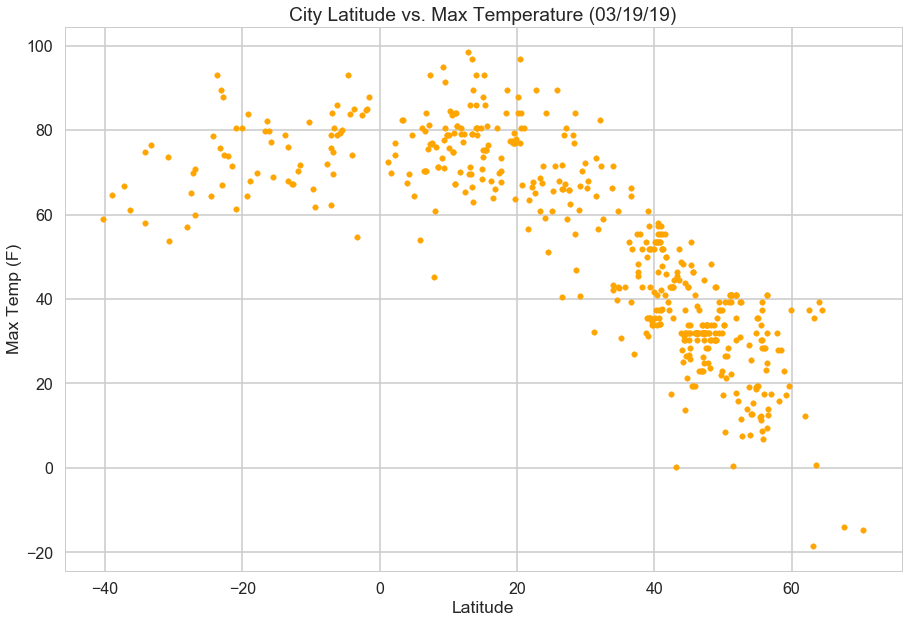

In [202]:
#Scatter plot for Lat vs Temp
plt.figure(figsize=(15,10))
plt.scatter(weather_df['Latitude'],weather_df['Max Temperature'], marker='o',color='orange', s=30)
plt.title('City Latitude vs. Max Temperature (03/19/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.savefig('Lat_vs_Temp.png')
plt.show()

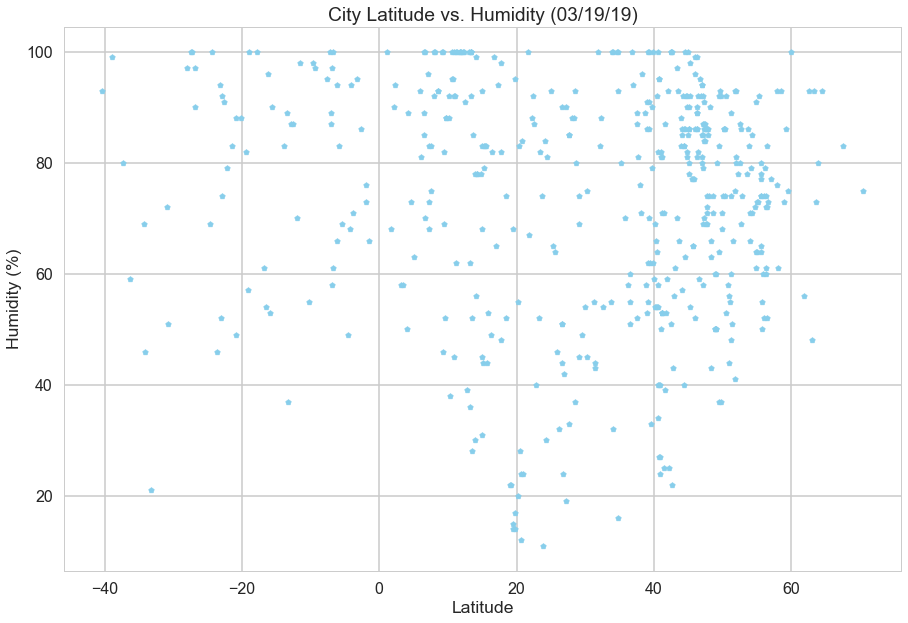

In [203]:
#Scatter plot for Lat vs Humidity
plt.figure(figsize=(15,10))
plt.scatter(weather_df['Latitude'],weather_df['Humidity %'], marker='p', color='skyblue', s=35)
plt.title('City Latitude vs. Humidity (03/19/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('Lat_vs_Humid.png')
plt.show()

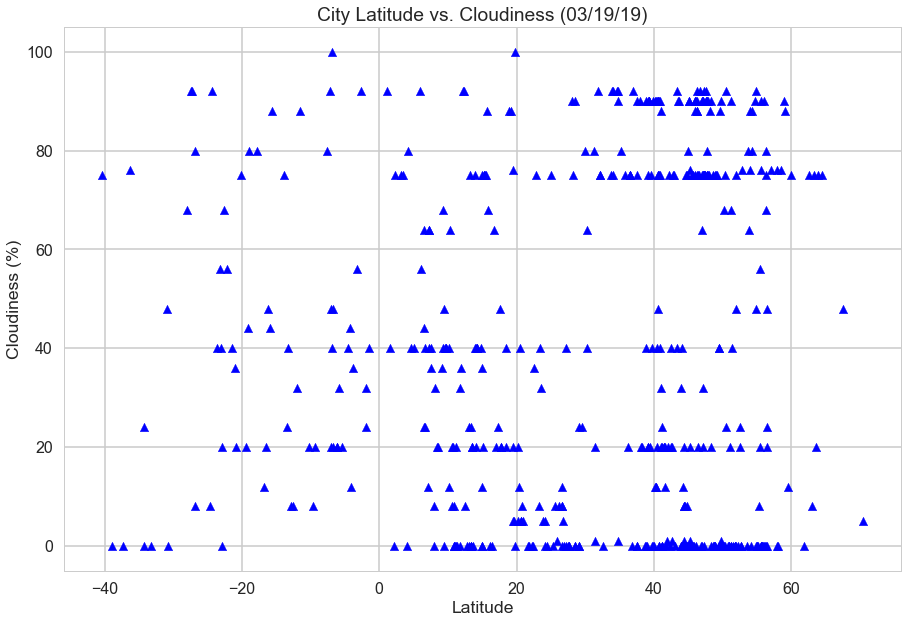

In [204]:
#Scatter plot for Lat vs Cloudiness
plt.figure(figsize=(15,10))
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness %'], marker='^', color='blue', s=70)
plt.title('City Latitude vs. Cloudiness (03/19/19)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('Lat_vs_Cloud.png')
plt.show()

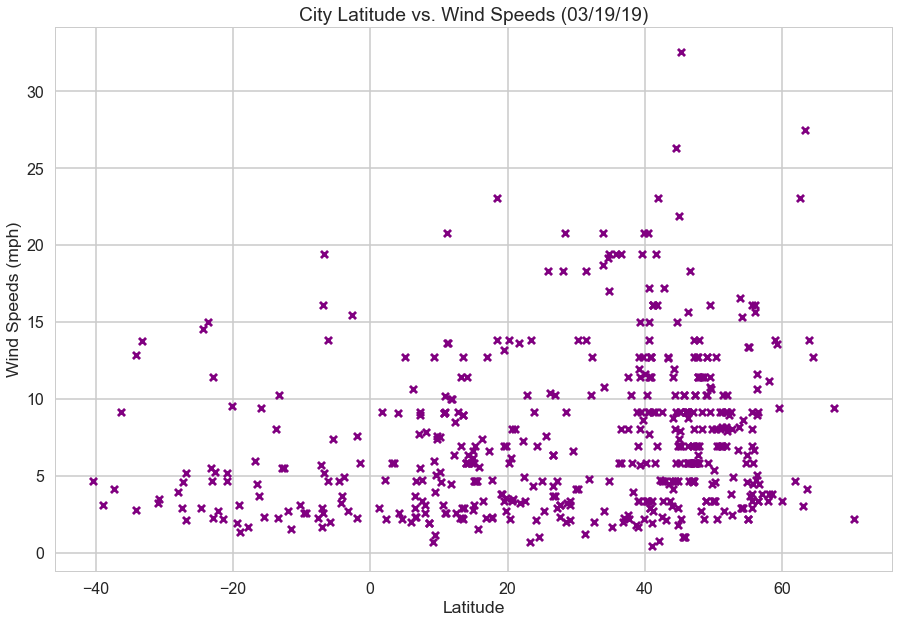

In [205]:
#Scatter plot for Lat vs Wind Speeds
plt.figure(figsize=(15,10))
plt.scatter(weather_df['Latitude'],weather_df['Wind Speeds'], marker='x', color='purple', s=50)
plt.title('City Latitude vs. Wind Speeds (03/19/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speeds (mph)')
plt.savefig('Lat_vs_Winds.png')
plt.show()